# Stroke Detection 

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import seaborn as sns
%matplotlib inline

In [67]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df
#df[df['bmi'].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [68]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [69]:
df.shape

(5110, 12)

In [70]:
mdf = df['bmi'].mean()

In [71]:
df['bmi'].fillna(mdf,inplace=True)

In [72]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [73]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [74]:
df.select_dtypes(['int64']).columns #integer type columns

Index(['id', 'hypertension', 'heart_disease', 'stroke'], dtype='object')

In [75]:
df.select_dtypes(['float']).columns

Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

In [76]:
df.select_dtypes(['object']).columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [77]:
categorical=['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status']
numerical=['hypertension', 'heart_disease', 'stroke','age','bmi','avg_glucose_level']

In [78]:
#All the categorical values
print("Values in Work Type")
print(df['work_type'].unique())
print("Values in Hypertension")
print(df['hypertension'].unique())
print("Values in heart_disease")
print(df['heart_disease'].unique())
print("Values in Residence_type")
print(df['Residence_type'].unique())
print("Values in gender")
print(df['gender'].unique())

Values in Work Type
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Values in Hypertension
[0 1]
Values in heart_disease
[1 0]
Values in Residence_type
['Urban' 'Rural']
Values in gender
['Male' 'Female' 'Other']


<AxesSubplot:xlabel='age'>

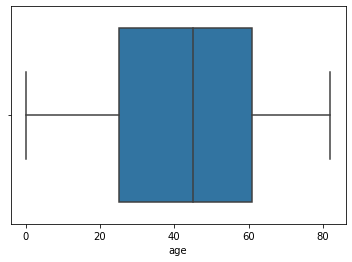

In [79]:
#sns.histplot(x=df['age'],bins=30,kde=True,color="green")
sns.boxplot(data=df,x='age')

(2115, 12)
(2994, 12)
(1, 12)


<AxesSubplot:xlabel='gender', ylabel='count'>

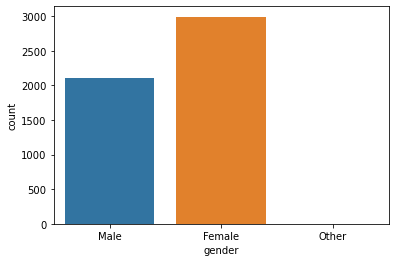

In [80]:
print(df[df['gender']=='Male'].shape)
print(df[df['gender']=='Female'].shape)
print(df[df['gender']=='Other'].shape)
sns.countplot(data=df,x='gender')

(2596, 12)
(2514, 12)


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

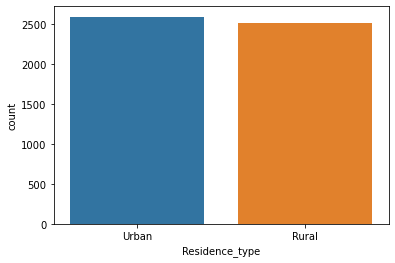

In [81]:
print(df[df['Residence_type']=='Urban'].shape)
print(df[df['Residence_type']=='Rural'].shape)
sns.countplot(data=df,x='Residence_type')

(4612, 12)
(498, 12)


<AxesSubplot:xlabel='hypertension', ylabel='count'>

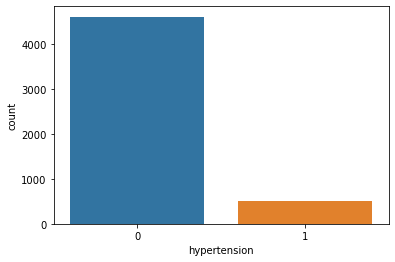

In [82]:
print(df[df['hypertension']==0].shape)
print(df[df['hypertension']==1].shape)
sns.countplot(data=df,x='hypertension')  #,hue='gender'

(4861, 12)
(249, 12)


<AxesSubplot:xlabel='stroke', ylabel='count'>

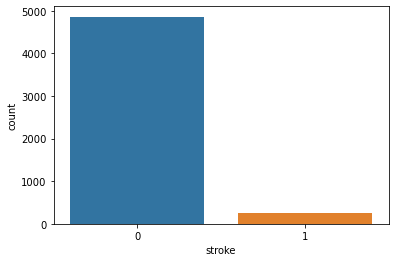

In [83]:
print(df[df['stroke']==0].shape)
print(df[df['stroke']==1].shape)
sns.countplot(data=df,x='stroke')

<AxesSubplot:xlabel='age', ylabel='Count'>

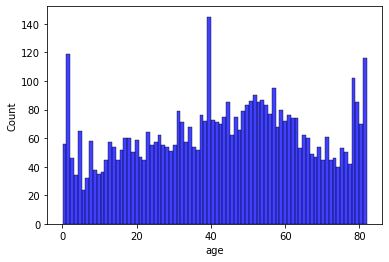

In [84]:
sns.histplot(x=df['age'],bins=80,color="blue")

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

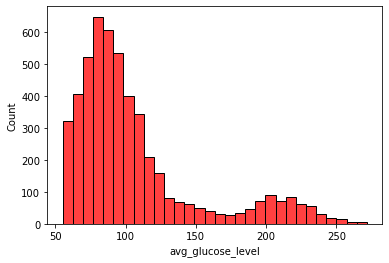

In [85]:
sns.histplot(x=df['avg_glucose_level'],bins=30,color="red")

<AxesSubplot:xlabel='bmi', ylabel='Count'>

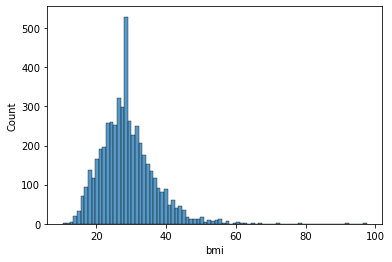

In [86]:
sns.histplot(x=df['bmi'])

In [87]:
df[df['smoking_status']=="Unknown"].count()

id                   1544
gender               1544
age                  1544
hypertension         1544
heart_disease        1544
ever_married         1544
work_type            1544
Residence_type       1544
avg_glucose_level    1544
bmi                  1544
smoking_status       1544
stroke               1544
dtype: int64

In [88]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

<AxesSubplot:xlabel='age', ylabel='bmi'>

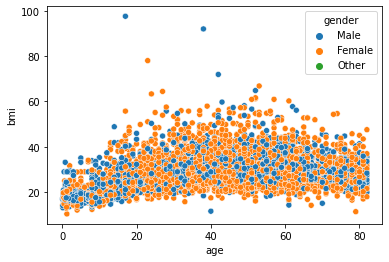

In [89]:
sns.scatterplot(x=df['age'],y=df['bmi'],hue=df['gender'])

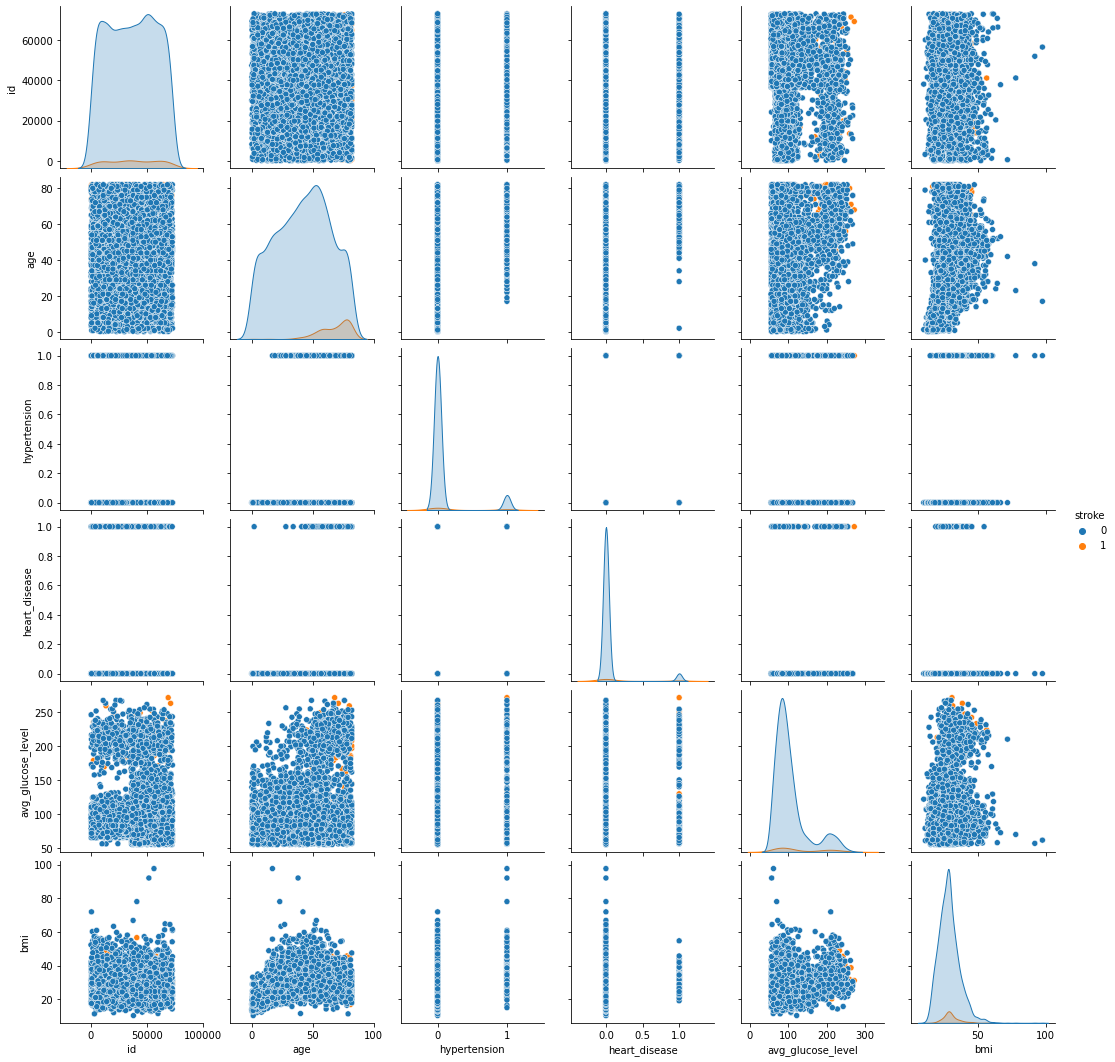

In [90]:
sns.pairplot(df,hue='stroke')

<AxesSubplot:xlabel='heart_disease'>

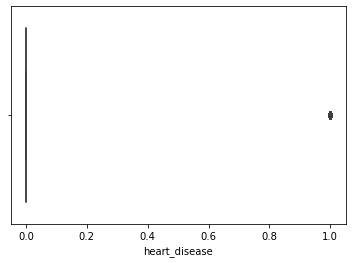

In [91]:
sns.boxplot(data=df,x='heart_disease')

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

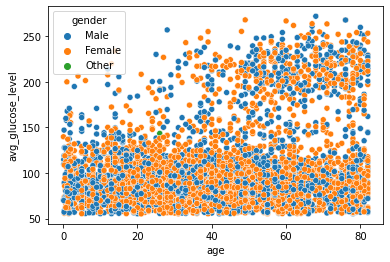

In [92]:
sns.scatterplot(data=df,x='age',y='avg_glucose_level',hue='gender')

<AxesSubplot:xlabel='age', ylabel='bmi'>

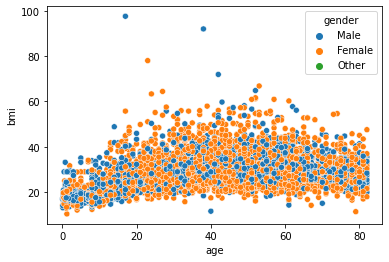

In [93]:
sns.scatterplot(data=df,x='age',y='bmi',hue='gender')

In [94]:
df.drop('id',inplace=True,axis=1)

In [95]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [96]:
ds_res = pd.get_dummies(df,columns=categorical,drop_first=True) #handling the categorical values using dumies

In [97]:
ds_res.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


In [98]:
ds_res.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [99]:
ds_res = ds_res[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi' , 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes',
       'stroke']]
ds_res.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67.0,0,1,228.69,36.600000,1,0,1,0,1,0,0,1,1,0,0,1
1,61.0,0,0,202.21,28.893237,0,0,1,0,0,1,0,0,0,1,0,1
2,80.0,0,1,105.92,32.500000,1,0,1,0,1,0,0,0,0,1,0,1
3,49.0,0,0,171.23,34.400000,0,0,1,0,1,0,0,1,0,0,1,1
4,79.0,1,0,174.12,24.000000,0,0,1,0,0,1,0,0,0,1,0,1


In [100]:
print(ds_res.shape)
print(sum(ds_res['stroke']==1))
print(sum(ds_res['stroke']==0))   # data set is imbalanced

(5110, 17)
249
4861


In [101]:
X=ds_res.iloc[:,:-1]
Y=ds_res.iloc[:,-1]

In [102]:
X.shape

(5110, 16)

In [103]:
Y.shape

(5110,)

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, shuffle=True)

In [105]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4088, 16)
(4088,)
(1022, 16)
(1022,)


In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
X_standard= StandardScaler().fit(X_train)
X_train_Std = X_standard.transform(X_train)
X_train_Std

array([[-1.40398465, -0.32566947, -0.23387082, ..., -0.45062248,
        -0.76935058, -0.4272332 ],
       [-0.78804425, -0.32566947, -0.23387082, ..., -0.45062248,
        -0.76935058,  2.34064209],
       [ 0.57582377, -0.32566947, -0.23387082, ..., -0.45062248,
        -0.76935058, -0.4272332 ],
       ...,
       [ 1.54373011, -0.32566947, -0.23387082, ..., -0.45062248,
        -0.76935058, -0.4272332 ],
       [ 1.58772585,  3.07059789, -0.23387082, ...,  2.21915247,
        -0.76935058, -0.4272332 ],
       [-1.84042242, -0.32566947, -0.23387082, ..., -0.45062248,
        -0.76935058, -0.4272332 ]])

In [108]:
X_standard= StandardScaler().fit(X_test)
X_test_Std = X_standard.transform(X_test)
X_test_Std

array([[-1.06351928, -0.3401772 , -0.25846827, ..., -0.4855842 ,
         1.32185923, -0.42763345],
       [ 1.06480955, -0.3401772 , -0.25846827, ..., -0.4855842 ,
        -0.75651021,  2.33845129],
       [ 0.793108  , -0.3401772 , -0.25846827, ...,  2.05937506,
        -0.75651021, -0.42763345],
       ...,
       [-1.24465364, -0.3401772 , -0.25846827, ..., -0.4855842 ,
         1.32185923, -0.42763345],
       [ 0.56669004, -0.3401772 , -0.25846827, ...,  2.05937506,
        -0.75651021, -0.42763345],
       [ 1.42707828, -0.3401772 , -0.25846827, ..., -0.4855842 ,
         1.32185923, -0.42763345]])

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
rf = RandomForestClassifier()
rf.fit(X_train_Std,y_train)
y_pred = rf.predict(X_test_Std)
count=0
arrrr=[]
for i in range(len(y_pred)):
    if y_pred[i] ==1:
        arrrr.append(i)
        count+=1
print(y_pred.shape)
print(count)
print(y_pred)
print(arrrr)


(1022,)
2
[0 0 0 ... 0 0 0]
[41, 720]


In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
Knn= KNeighborsClassifier()
Knn.fit(X_train_Std,y_train)
y_pre = Knn.predict(X_test_Std)
count=0
arrrr=[]
for i in range(len(y_pre)):
    if y_pre[i] ==1:
        arrrr.append(i)
        count+=1
print(y_pre.shape)
print(count)
print(arrrr)

(1022,)
5
[259, 270, 539, 890, 913]


In [113]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[970,   2],
       [ 50,   0]], dtype=int64)

Smoting the sample as it is non balanced

In [114]:
from imblearn.over_sampling import SMOTE
sm= SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())
x_test_res,y_test_res = sm.fit_resample(X_test,y_test.ravel())
arrrr=[]
count=0
for i in range(len(y_train_res)):
    if y_train_res[i] ==1:
        arrrr.append(i)
        count+=1
print(y_pred.shape)
print(count)

(1022,)
3889


In [115]:
#Scalling the data for better fit
from sklearn.preprocessing import StandardScaler
X_standard= StandardScaler().fit(x_train_res)
X_train_Std = X_standard.transform(x_train_res)
X_standard= StandardScaler().fit(x_test_res)
X_test_Std = X_standard.transform(x_test_res)

In [116]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_res,y_train_res)  # Random forest doesn't need to have a scaled data. 
y_pred = rf.predict(x_test_res)
count_1=0
arrrr=[]
for i in range(len(y_pred)):
    if y_pred[i] ==1:
        arrrr.append(i)
        count_1+=1
print(y_pred.shape)
print(count_1)
count_0=0
for i in range(len(y_pred)):
    if y_pred[i] ==0:
        arrrr.append(i)
        count_0+=1
print(count_0)

(1944,)
578
1366


In [117]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_res,y_pred)
cm

array([[918,  54],
       [448, 524]], dtype=int64)

In [118]:
from sklearn import metrics
metrics.accuracy_score(y_test_res,y_pred)     

0.7417695473251029

In [119]:
from sklearn.neighbors import KNeighborsClassifier
Knn= KNeighborsClassifier()
Knn.fit(X_train_Std,y_train_res)
y_pre = Knn.predict(X_test_Std)
count=0
arrrr=[]
for i in range(len(y_pre)):
    if y_pre[i] ==1:
        arrrr.append(i)
        count+=1
print(y_pre.shape)
print(count_1)
count_0=0
for i in range(len(y_pre)):
    if y_pre[i] ==0:
        arrrr.append(i)
        count_0+=1
print(count_0)

(1944,)
578
1162


In [120]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_res,y_pre)

array([[852, 120],
       [310, 662]], dtype=int64)

In [121]:
from sklearn import metrics
metrics.accuracy_score(y_test_res,y_pre)

0.7788065843621399

In [122]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_Std,y_train_res)
y_pred = gnb.predict(X_test_Std)
for i in range(len(y_pred)):
    if y_pred[i] ==1:
        arrrr.append(i)
        count+=1
print(y_pred.shape)
print(count_1)
count_0=0
for i in range(len(y_pred)):
    if y_pred[i] ==0:
        arrrr.append(i)
        count_0+=1
print(count_0)

(1944,)
578
1944


In [123]:
confusion_matrix(y_test_res,y_pred)  #not giving good accuracy

array([[972,   0],
       [972,   0]], dtype=int64)

In [124]:
from sklearn import metrics
metrics.accuracy_score(y_test_res,y_pred)
#discarding Naive Bayes

0.5

In [125]:
from sklearn.model_selection import cross_val_score
scores_Knn = cross_val_score(Knn , X_train_Std,y_train_res , cv=5 , scoring = 'accuracy')
scores_RF = cross_val_score(rf , X_train_Std,y_train_res , cv=5 , scoring = 'accuracy')
print(scores_Knn.mean())
print(scores_RF.mean())  #95 % for Random Forest , so for this DS we will be using Random Forest.

0.9142473487134131
0.9528181750551749


In [126]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_Std, y_train_res)

SVC(kernel='linear', random_state=0)

In [127]:
y_pred_sv = classifier.predict(X_test_Std)
confusion_matrix(y_test_res,y_pred_sv)


array([[800, 172],
       [158, 814]], dtype=int64)

In [128]:
scores_SVM = cross_val_score(classifier , X_train_Std,y_train_res , cv=5 , scoring = 'accuracy')
print(scores_SVM.mean())

0.8702778168111822


So concluding that for the current data Random forest is fitting best. 

<AxesSubplot:>

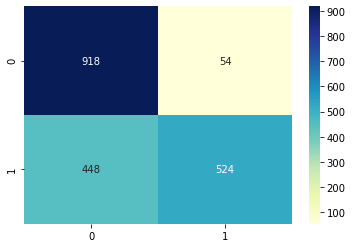

In [138]:
sns.heatmap(cm,annot=True,fmt='d',cmap="YlGnBu")  # heatmap for confusion matrix  